# Optimizing marketing expenses of Yandex.Afisha (06.2017 through 05.2018)

the task of this project is to anylize the data to optimize marketing expenses of online ticketing platform Yandex.Afisha. This analysis is part of a strategy to enhance user engagement and maximize the return on marketing investments.

The data provided includes:

- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Order records, detailing transactions over the same period
- Marketing expenses data: containing spending information across different advertising channels

Our main objectives are to understand how users interact with the product, identify their purchasing behavior, calculate customer lifetime value (LTV), and evaluate the effectiveness of marketing expenditures.

__Key Areas of Analysis__


__Product Usage:__

- Measuring daily, weekly, and monthly active users
- Calculating the number of sessions per day and session duration
- Analyzing user retention rates over time


__Sales Performance:__

- Determining the average time between registration and first purchase (conversion rate)
- Examining purchasing patterns, such as average order frequency and order size
- Estimating customer lifetime value (LTV)


__Marketing Efficiency:__

- Calculating total and source-specific marketing expenses
- Determining customer acquisition cost (CAC) for each channel
- Assessing the return on investment (ROI) for different marketing channels


__Goals and Outcome__
The project aims to produce insights that will guide marketing activity. By identifying the most effective channels, we can recommend budget allocation to maximize LTV and minimize CAC, optimizing the marketing expences for Yandex.Afisha. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Download the data and prepare it for analysis

### Read 'visits_log_us.csv' to 'visits' df:

In [2]:
visits = pd.read_csv(
    '/datasets/visits_log_us.csv',
    dtype={'Device':'category'},
    parse_dates=['Start Ts','End Ts']
)

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [3]:
# rename columns for better usability
visits.rename(columns={'End Ts':'End_Ts', 'Source Id':'Source_Id', 'Start Ts':'Start_Ts'}, inplace=True)
visits.columns = visits.columns.str.lower()
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

#### Check for missing values

We don't see and missing values, since all columns have the same quantity of rows

#### Check for duplicates

Let's check for obvious duplicates

In [4]:
visits.duplicated().sum()

0

Let's check only 'start_ts' and 'uid' columns, since the records with such duplicated values can't exist in the df 

In [5]:
visits.duplicated(subset=['start_ts','uid']).sum()


1

In [6]:
visits = visits.drop_duplicates(subset=['start_ts','uid'], keep=False)
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359398 non-null  category      
 1   end_ts     359398 non-null  datetime64[ns]
 2   source_id  359398 non-null  int64         
 3   start_ts   359398 non-null  datetime64[ns]
 4   uid        359398 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 14.1 MB


### Read 'orders_log_us.csv' to 'orders' df:

In [7]:
orders = pd.read_csv(
    '/datasets/orders_log_us.csv',
    parse_dates=['Buy Ts']
)

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [8]:
# rename columns for better usability
orders.rename(columns={'Buy Ts':'Buy_Ts'}, inplace=True)
orders.columns = orders.columns.str.lower()
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

#### Check for missing values

No missing values, since all columns have the same nuber of rows.

#### Check for duplicates

Let's check for obvious duplicates

In [9]:
orders.duplicated().sum()

0

In [10]:
orders.duplicated(subset=['buy_ts','uid']).sum()


0

No duplicated data

### Read 'costs_us.csv' to 'costs' df

In [11]:
costs = pd.read_csv(
    '/datasets/costs_us.csv',
    parse_dates=['dt']
)

costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

#### Check for missing values

No missing values, since all columns have the same nuber of rows.

#### Check for duplicates

In [12]:
orders.duplicated().sum()

0

No duplicated data

__Conclusion:__
all datasets 
- have been read correctly, 
- do not contain missing values,
- datatypes have been optimized 

## Make reports and calculate metrics

### Product

#### How many people use it every day, week, and month?

Let's convert the start time stamp into date, week. month and year to calculate DAU, MAU, WAU metrics

In [13]:
visits['date'] = pd.to_datetime(visits['start_ts']).values.astype('datetime64[D]')
visits['week'] = pd.to_datetime(visits['start_ts']).values.astype('datetime64[W]')
visits['month'] = pd.to_datetime(visits['start_ts']).values.astype('datetime64[M]')
visits['year'] = pd.to_datetime(visits['start_ts']).values.astype('datetime64[Y]')
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid       date       week      month       year  
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01 2017-01-01  
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01 2018-01-01  
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01 2017-01-01  
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01 2018-01-01  
4   9969694820036681168 2017-12-27 2017-12-21 2017-12-01 2017-01-01

In [14]:
dau = visits.groupby(visits['date'])['uid'].nunique().reset_index()

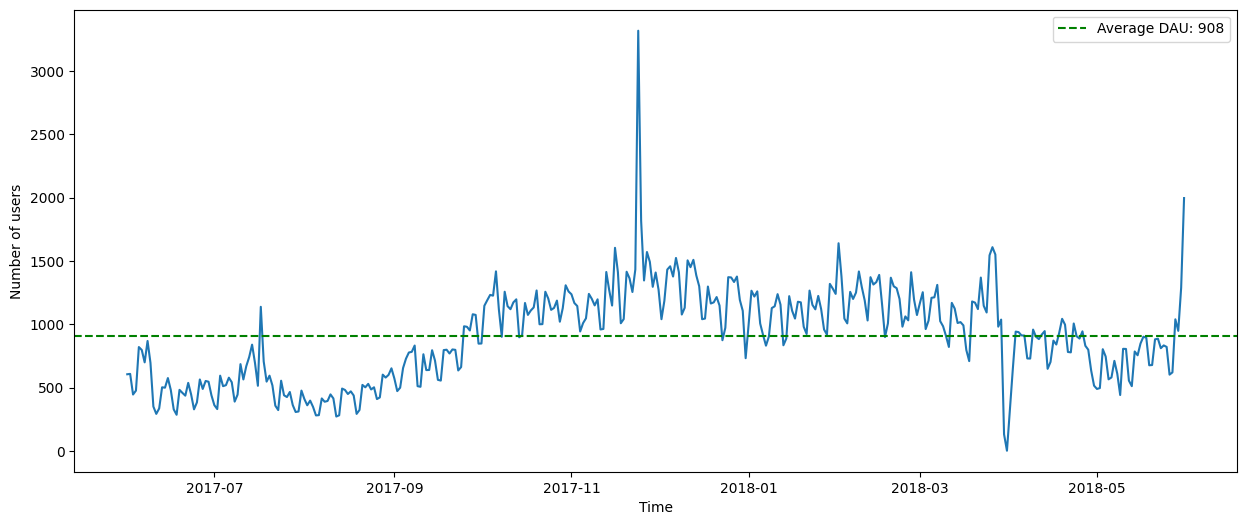

In [15]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=dau, x='date', y='uid')
average_dau = dau['uid'].mean()
plt.axhline(y=average_dau, color='green', linestyle='--', label=f'Average DAU: {average_dau:.0f}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of users')
plt.show()

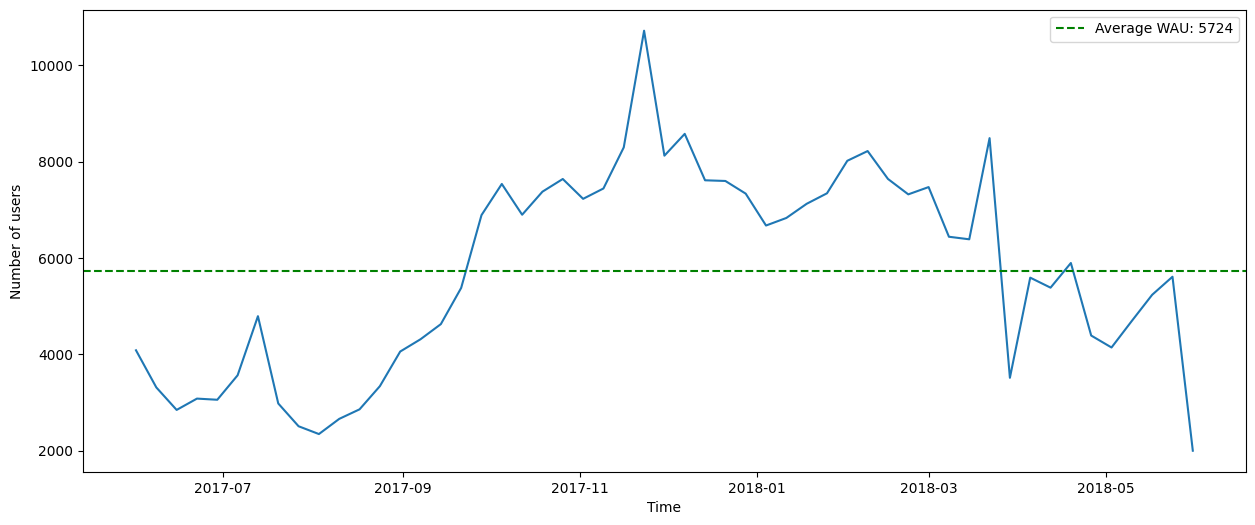

In [16]:
wau = visits.groupby(visits['week'])['uid'].nunique().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(data=wau, x='week', y='uid')
average_wau = wau['uid'].mean()
plt.axhline(y=average_wau, color='green', linestyle='--', label=f'Average WAU: {average_wau:.0f}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of users')
plt.show()

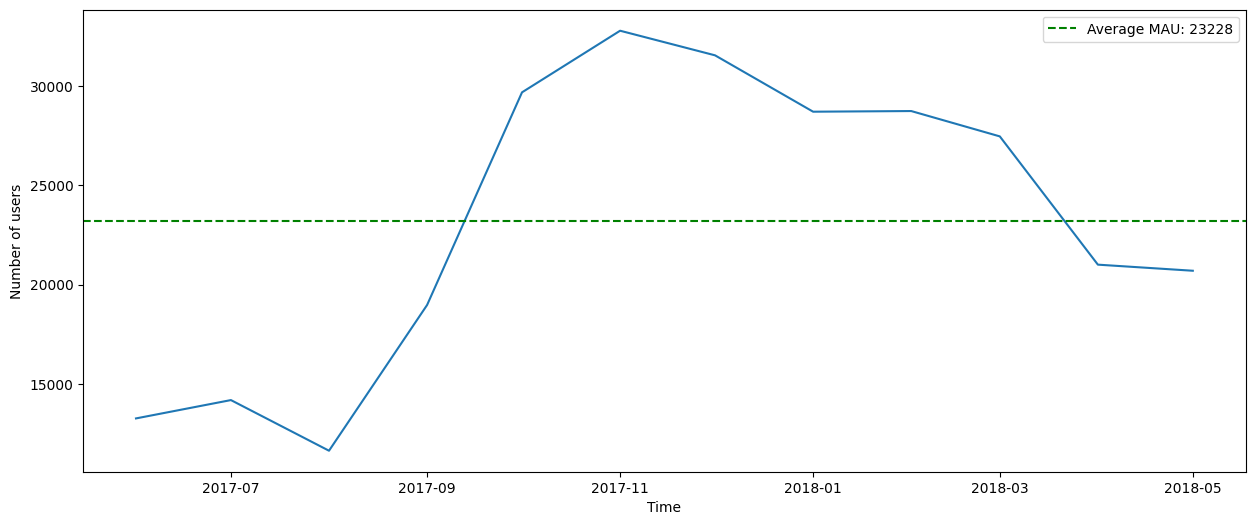

In [17]:
mau = visits.groupby(visits['month'])['uid'].nunique().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(data=mau, x='month', y='uid')
average_mau = mau['uid'].mean()
plt.axhline(y=average_mau, color='green', linestyle='--', label=f'Average MAU: {average_mau:.0f}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of users')
plt.show()

__Conclusion__: 

Daily, Weekly, and Monthly Active Users: Analysis showed that user engagement varies seasonally, with peak activity around the holiday season (November-December) and drop-off after the holiday season. Daily active users (DAU) increase during promotional events with spikes around August and December, and a big drop down in April 2018. Users in average have under two sessions per day. Weekly (WAU) and monthly active users (MAU) provide a broader perspective of customer envolvement over time.

Yandex.Afisha can capitalize on seasonal spikes by increasing promotional efforts around peak times to maximize user engagement.


#### How many sessions are there per day? (One user might have more than one session.)

In [18]:
sessions_per_day = (
    visits.groupby(['year', 'month', 'date'])
    .agg({'uid':['count','nunique']})
)
sessions_per_day.columns = ['n_sessions','n_users']
sessions_per_day['sessions_per_user'] = (
    sessions_per_day['n_sessions'] / sessions_per_day['n_users']
)

sessions_per_day

n_sessions  n_users  sessions_per_user
year       month      date                                              
2017-01-01 2017-06-01 2017-06-01         664      605           1.097521
                      2017-06-02         658      608           1.082237
                      2017-06-03         477      445           1.071910
                      2017-06-04         510      476           1.071429
                      2017-06-05         893      820           1.089024
...                                      ...      ...                ...
2018-01-01 2018-05-01 2018-05-27         672      620           1.083871
                      2018-05-28        1156     1039           1.112608
                      2018-05-29        1035      948           1.091772
                      2018-05-30        1410     1289           1.093871
                      2018-05-31        2256     1997           1.129695

[364 rows x 3 columns]

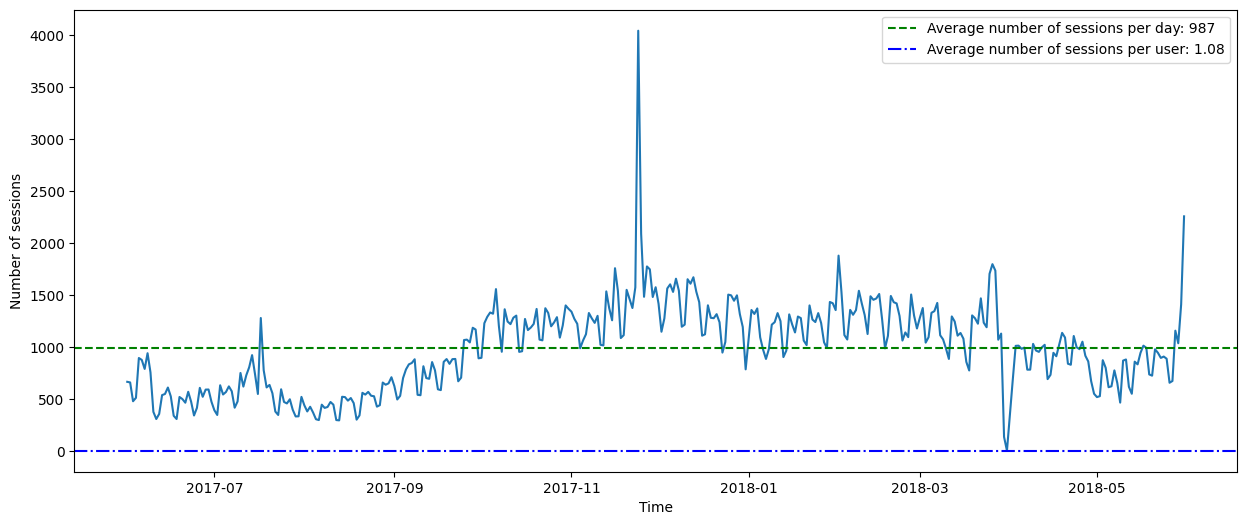

In [19]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=sessions_per_day, x='date', y='n_sessions')
average_n_sessions = sessions_per_day['n_sessions'].mean()
average_n_users = sessions_per_day['sessions_per_user'].mean()
plt.axhline(y=average_n_sessions, color='green', linestyle='--', label=f'Average number of sessions per day: {average_n_sessions:.0f}')
plt.axhline(y=average_n_users, color='blue', linestyle='-.', label=f'Average number of sessions per user: {average_n_users:.2f}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of sessions')
plt.show()

Let's compare number of sessions per day and number of dayly active users. 

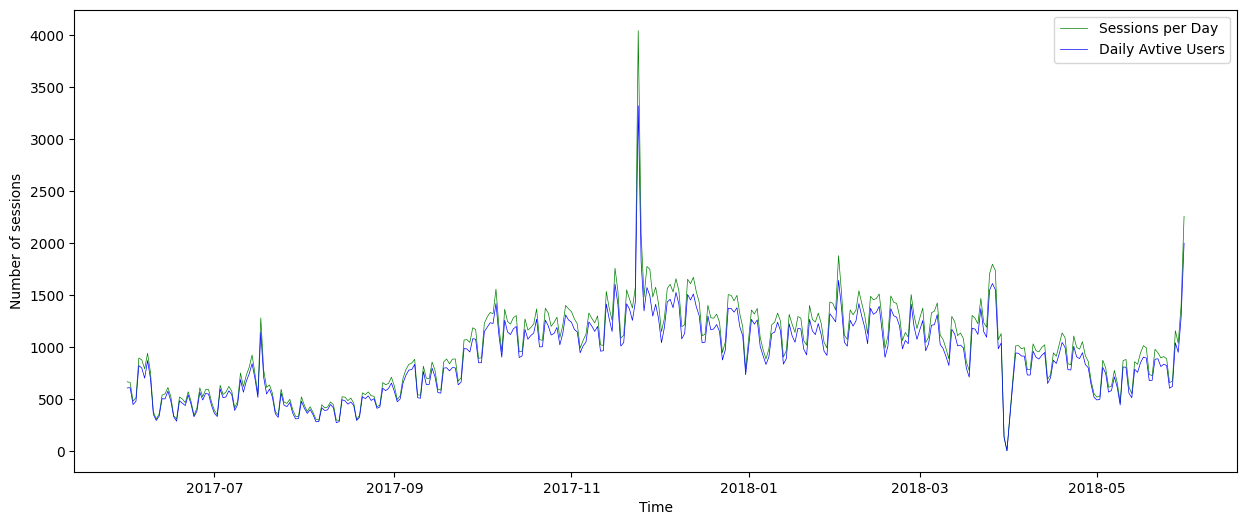

In [20]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=sessions_per_day, x='date', y='n_sessions', color='green', linewidth=0.5, label='Sessions per Day')
sns.lineplot(data=dau, x='date', y='uid', color='blue', linewidth=0.5, label='Daily Avtive Users')
average_n_sessions = sessions_per_day['n_sessions'].mean()
average_n_users = sessions_per_day['sessions_per_user'].mean()

plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of sessions')
plt.show()

as ths graph shows both results are almost identical throughout the whole period under study.

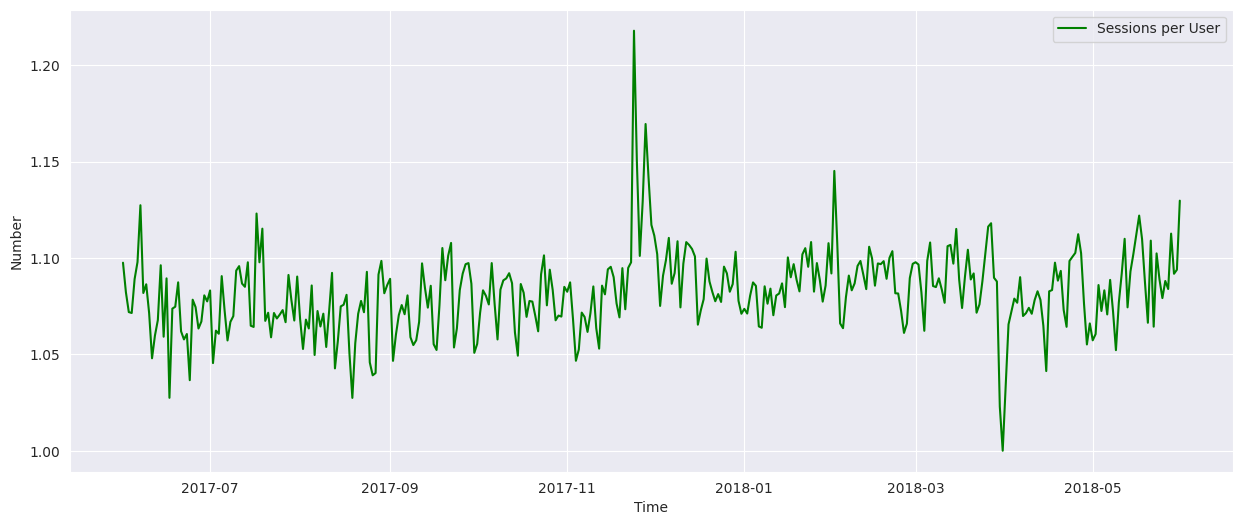

In [21]:
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
sns.lineplot(data=sessions_per_day, x='date', y='sessions_per_user', color='green', label='Sessions per User')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Number')
plt.show()

The above graph shows that users have less then 2 sessions on average.

__Conclusion:__ the average number of sessions is less than 2 per user and repeats the same tendency as DAU, MAU, and WAU.

#### What is the length of each session?

In [22]:
visits['session_length'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print (visits['session_length'].mean().round(2))


643.51


<AxesSubplot:>

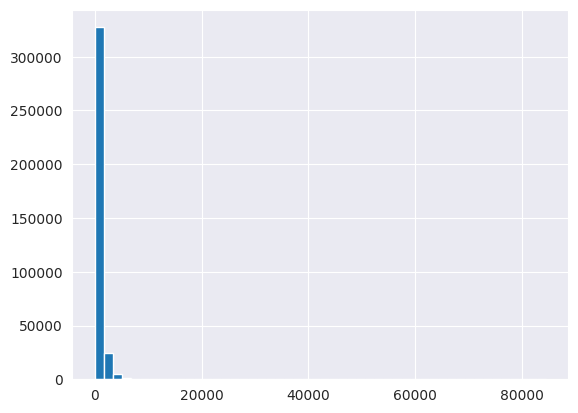

In [23]:
visits['session_length'].hist(bins=50)

let's have a zoom in look:

<AxesSubplot:>

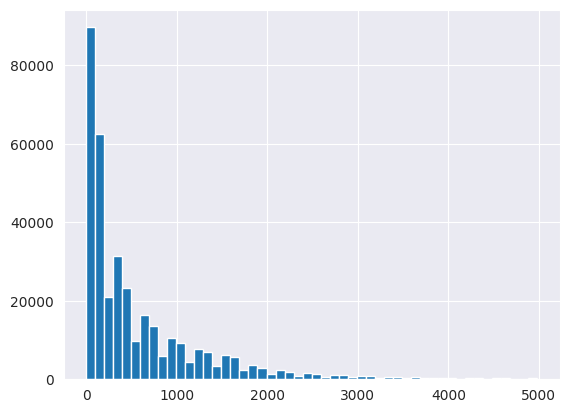

In [24]:
visits['session_length'][visits['session_length']<5000].hist(bins=50)

In [25]:
visits['session_length'].describe()

count    359398.000000
mean        643.509736
std        1016.336672
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_length, dtype: float64

__Conclusion:__
Most sessions are relatively short (around 120 sec.), which could mean that users mainly use the platform for specific purposes rather than browsing.

Yandex.Afisha could improve a user-friendly interface that will help users quickly find and purchase tickets, enhancing their short interactions.



#### What's the user retention rate (monthly)

In [26]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid       date       week      month       year  \
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01 2017-01-01   
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01 2018-01-01   
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01 2017-01-01   
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01 2018-01-01   
4   9969694820036681168 2017-12-27 2017-12-21 2017-12-01 2017-01-01   

   session_length  
0            1080  
1            1680  
2               0  
3            1440  
4               0

In [27]:
first_visit_date = visits.groupby('uid')['date'].min()
first_visit_date.name = 'first_visit_date'
first_visit_date.head()

uid
11863502262781    2018-03-01
49537067089222    2018-02-06
297729379853735   2017-06-07
313578113262317   2017-09-18
325320750514679   2017-09-30
Name: first_visit_date, dtype: datetime64[ns]

In [28]:
visits = visits.join(first_visit_date, how='inner', on='uid')
visits.head()

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
114820  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                         uid       date       week      month       year  \
0       16879256277535980062 2017-12-20 2017-12-14 2017-12-01 2017-01-01   
1         104060357244891740 2018-02-19 2018-02-15 2018-02-01 2018-01-01   
2        7459035603376831527 2017-07-01 2017-06-29 2017-07-01 2017-01-01   
3       16174680259334210214 2018-05-20 2018-05-17 2018-05-01 2018-01-01   
114820  16174680259334210214 2018-03-09 2018-03-08 2018-03-01 2018-01-01   

        session_length first_visit_date  
0                 1080       2017-12-20  
1                 1680       2018-02-19  
2                    0       2017-07-01  
3                 1440       2018-03-09  
114820            1680       2018-03-09

In [29]:
visits['first_visit_month'] = visits['first_visit_date'].values.astype('datetime64[M]')
visits['cohort_lifetime'] = ((pd.to_datetime(visits['date']) - pd.to_datetime(visits['first_visit_date'])) / np.timedelta64(1,'M')).round().astype('int')
visits.head()

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
114820  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                         uid       date       week      month       year  \
0       16879256277535980062 2017-12-20 2017-12-14 2017-12-01 2017-01-01   
1         104060357244891740 2018-02-19 2018-02-15 2018-02-01 2018-01-01   
2        7459035603376831527 2017-07-01 2017-06-29 2017-07-01 2017-01-01   
3       16174680259334210214 2018-05-20 2018-05-17 2018-05-01 2018-01-01   
114820  16174680259334210214 2018-03-09 2018-03-08 2018-03-01 2018-01-01   

        session_length first_visit_date first_visit_month  cohort_lifetime  
0                 1080       2017-12-20        2017-12-01                0  
1                 1680       2018-02-19        2018-02-01                0  
2                    0       2017-07-01        2017-07-01                0  
3                 1440       2018-03-09        2018-03-01                2  
114820            1680       2018-03-09        2018-03-01                0

In [30]:
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

first_visit_month  cohort_lifetime    uid
0         2017-06-01                0  13259
1         2017-06-01                1    976
2         2017-06-01                2    718
3         2017-06-01                3    805
4         2017-06-01                4    910
..               ...              ...    ...
85        2018-04-01                0  15709
86        2018-04-01                1    622
87        2018-04-01                2     68
88        2018-05-01                0  15273
89        2018-05-01                1    100

[90 rows x 3 columns]

In [31]:
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'n_cohort_users'})
initial_users_count.head()

first_visit_month  n_cohort_users
0         2017-06-01           13259
13        2017-07-01           13140
25        2017-08-01           10181
36        2017-09-01           16704
46        2017-10-01           25977

In [32]:
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
cohorts.head()

first_visit_month  cohort_lifetime    uid  n_cohort_users
0        2017-06-01                0  13259           13259
1        2017-06-01                1    976           13259
2        2017-06-01                2    718           13259
3        2017-06-01                3    805           13259
4        2017-06-01                4    910           13259

In [33]:
cohorts['retention'] = cohorts['uid'] / cohorts['n_cohort_users']

<AxesSubplot:title={'center':'User Retention by Monthly Cohorts'}, xlabel='cohort_lifetime', ylabel='first_visit_month'>

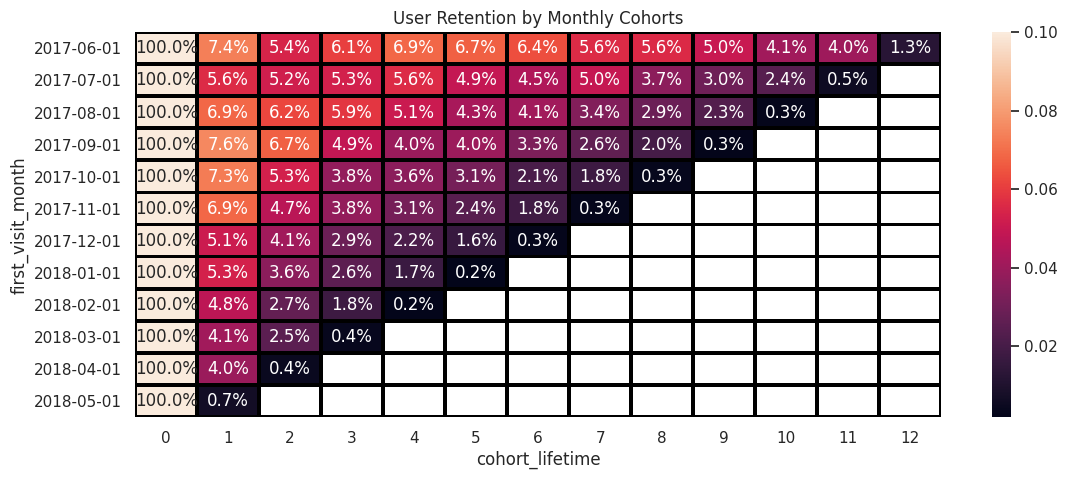

In [34]:
retention_pivot = cohorts.pivot_table(
    index=cohorts['first_visit_month'].astype(str),
    columns='cohort_lifetime', 
    values='retention',
    aggfunc='mean'
)

sns.set(style='white')
plt.figure(figsize=(13,5))
plt.title('User Retention by Monthly Cohorts')
sns.heatmap(data=retention_pivot, annot=True, fmt='.1%', linewidth=2, linecolor='black', vmax=0.1)


__Conclusion__: 

As seen in the graph the user retention decreases significantly over time, with rates below 1% in most cohorts by the end of their lifetime.
Retention data indicates that many users don’t return after their initial sessions, but those who do tend to stay engaged.

Retention marketing activity, such as personalized offers or loyalty programs, could improve long-term engagement and customer lifetime value.


### Sales

#### When do people start buying?

Frist let's find the date of the first purchase for each user

In [35]:
orders['purchase_date'] = pd.to_datetime(orders['buy_ts']).values.astype('datetime64[D]')
first_purchase = orders.groupby('uid')['purchase_date'].min()
first_purchase.name = 'first_purchase_date'
first_purchase

uid
313578113262317        2018-01-03
1575281904278712       2017-06-03
2429014661409475       2017-10-11
2464366381792757       2018-01-28
2551852515556206       2017-11-24
                          ...    
18445147675727495770   2017-11-24
18445407535914413204   2017-09-22
18445601152732270159   2018-03-26
18446156210226471712   2018-02-18
18446167067214817906   2017-10-17
Name: first_purchase_date, Length: 36523, dtype: datetime64[ns]

In [36]:
conversion = pd.merge(first_visit_date, first_purchase, on='uid', how='left')
conversion

first_visit_date first_purchase_date
uid                                                      
11863502262781             2018-03-01                 NaT
49537067089222             2018-02-06                 NaT
297729379853735            2017-06-07                 NaT
313578113262317            2017-09-18          2018-01-03
325320750514679            2017-09-30                 NaT
...                               ...                 ...
18446403737806311543       2017-11-30                 NaT
18446424184725333426       2017-12-06                 NaT
18446556406699109058       2018-01-01                 NaT
18446621818809592527       2017-12-27                 NaT
18446676030785672386       2017-10-04                 NaT

[228168 rows x 2 columns]

Now let's find the conversion in days

In [37]:
conversion_days = (conversion['first_purchase_date'] - conversion['first_visit_date']).dt.days
conversion_days

uid
11863502262781            NaN
49537067089222            NaN
297729379853735           NaN
313578113262317         107.0
325320750514679           NaN
                        ...  
18446403737806311543      NaN
18446424184725333426      NaN
18446556406699109058      NaN
18446621818809592527      NaN
18446676030785672386      NaN
Length: 228168, dtype: float64

<AxesSubplot:>

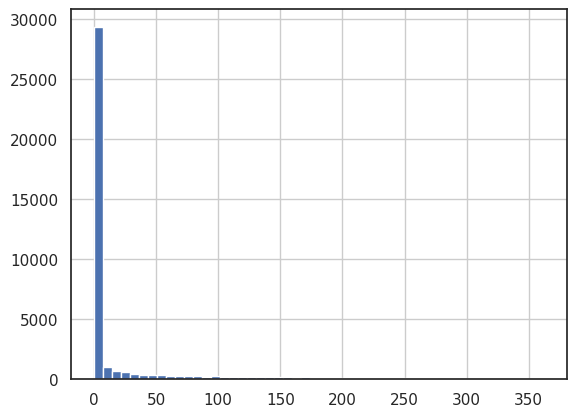

In [38]:
conversion_days.hist(bins=50)

In [39]:
conversion_days.describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
dtype: float64

In most cases users start buying in 2 days or less.

In [40]:
print('Overall conversion: {:.1%}'.format(orders['uid'].nunique()/visits['uid'].nunique()))

Overall conversion: 16.0%


In [41]:
conversion = pd.merge(conversion, visits[['uid','source_id']], on='uid', how='left')
conversion

uid first_visit_date first_purchase_date  source_id
0             11863502262781       2018-03-01                 NaT          3
1             49537067089222       2018-02-06                 NaT          2
2            297729379853735       2017-06-07                 NaT          3
3            313578113262317       2017-09-18          2018-01-03          2
4            313578113262317       2017-09-18          2018-01-03          2
...                      ...              ...                 ...        ...
359393  18446424184725333426       2017-12-06                 NaT          4
359394  18446556406699109058       2018-01-01                 NaT          3
359395  18446621818809592527       2017-12-27                 NaT          4
359396  18446621818809592527       2017-12-27                 NaT          4
359397  18446676030785672386       2017-10-04                 NaT          3

[359398 rows x 4 columns]

In [42]:
conversion['converted'] = ~conversion['first_purchase_date'].isna()
conversion

uid first_visit_date first_purchase_date  source_id  \
0             11863502262781       2018-03-01                 NaT          3   
1             49537067089222       2018-02-06                 NaT          2   
2            297729379853735       2017-06-07                 NaT          3   
3            313578113262317       2017-09-18          2018-01-03          2   
4            313578113262317       2017-09-18          2018-01-03          2   
...                      ...              ...                 ...        ...   
359393  18446424184725333426       2017-12-06                 NaT          4   
359394  18446556406699109058       2018-01-01                 NaT          3   
359395  18446621818809592527       2017-12-27                 NaT          4   
359396  18446621818809592527       2017-12-27                 NaT          4   
359397  18446676030785672386       2017-10-04                 NaT          3   

        converted  
0           False  
1           False  
2           False  
3            True  
4            True  
...           ...  
359393      False  
359394      False  
359395      False  
359396      False  
359397      False  

[359398 rows x 5 columns]

In [43]:
conversion['converted'] = conversion['converted'].astype(int)
conversion

uid first_visit_date first_purchase_date  source_id  \
0             11863502262781       2018-03-01                 NaT          3   
1             49537067089222       2018-02-06                 NaT          2   
2            297729379853735       2017-06-07                 NaT          3   
3            313578113262317       2017-09-18          2018-01-03          2   
4            313578113262317       2017-09-18          2018-01-03          2   
...                      ...              ...                 ...        ...   
359393  18446424184725333426       2017-12-06                 NaT          4   
359394  18446556406699109058       2018-01-01                 NaT          3   
359395  18446621818809592527       2017-12-27                 NaT          4   
359396  18446621818809592527       2017-12-27                 NaT          4   
359397  18446676030785672386       2017-10-04                 NaT          3   

        converted  
0               0  
1               0  
2               0  
3               1  
4               1  
...           ...  
359393          0  
359394          0  
359395          0  
359396          0  
359397          0  

[359398 rows x 5 columns]

In [44]:
total_users_by_source = conversion.groupby('source_id')['uid'].nunique().reset_index()
total_users_by_source

source_id    uid
0          1  18998
1          2  26245
2          3  74756
3          4  83525
4          5  56974
5          6      6
6          7     34
7          9   9264
8         10   8067

In [45]:
total_users_by_source['uid'].sum()
conversion['converted'].sum()

total_users_by_source['conversion rate, %'] = (total_users_by_source['uid']/total_users_by_source['uid'].sum()*100).round(3)
total_users_by_source

source_id    uid  conversion rate, %
0          1  18998               6.837
1          2  26245               9.445
2          3  74756              26.903
3          4  83525              30.059
4          5  56974              20.504
5          6      6               0.002
6          7     34               0.012
7          9   9264               3.334
8         10   8067               2.903

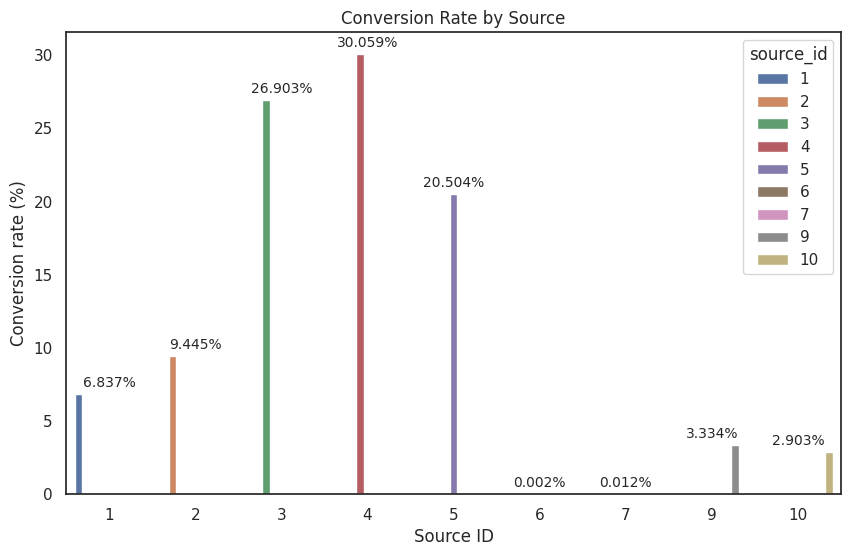

In [46]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=total_users_by_source, y='conversion rate, %', x='source_id', hue='source_id')
plt.title('Conversion Rate by Source')
plt.xlabel('Source ID')
plt.ylabel('Conversion rate (%)')
for i, v in enumerate(total_users_by_source['conversion rate, %']):
    plt.text(i, v + 0.5, f'{v:.3f}%', ha='center', fontsize=10)
plt.show()

__Conclusion__: 
- most people start buying within 2 days or less after their first visit
- overall conversion rate is 16%, which is relatively high
- the most effective marketing sources that impact the conversion are sources #3 and #4.

It is advised to focus on marketing sources 3 and 4 due to their high conversion potential.

#### How many orders do they make during a given period of time?

Let's make cohorts grouped by their first purchase date and see how many orders do users make throughout the lifetime of each cohort

In [47]:
orders = pd.merge(first_purchase, orders, on='uid')
orders

uid first_purchase_date              buy_ts  revenue  \
0           313578113262317          2018-01-03 2018-01-03 21:51:00     0.55   
1          1575281904278712          2017-06-03 2017-06-03 10:13:00     1.22   
2          1575281904278712          2017-06-03 2017-06-03 17:39:00     1.83   
3          2429014661409475          2017-10-11 2017-10-11 18:33:00    73.33   
4          2464366381792757          2018-01-28 2018-01-28 15:54:00     2.44   
...                     ...                 ...                 ...      ...   
50410  18445407535914413204          2017-09-22 2017-09-24 23:48:00     0.24   
50411  18445407535914413204          2017-09-22 2017-09-25 15:56:00     0.12   
50412  18445601152732270159          2018-03-26 2018-03-26 22:54:00     4.22   
50413  18446156210226471712          2018-02-18 2018-02-18 19:34:00     9.78   
50414  18446167067214817906          2017-10-17 2017-10-17 10:16:00     7.94   

      purchase_date  
0        2018-01-03  
1        2017-06-03  
2        2017-06-03  
3        2017-10-11  
4        2018-01-28  
...             ...  
50410    2017-09-24  
50411    2017-09-25  
50412    2018-03-26  
50413    2018-02-18  
50414    2017-10-17  

[50415 rows x 5 columns]

In [48]:
orders ['first_purchase_month'] = pd.to_datetime(orders['first_purchase_date']).values.astype('datetime64[M]')
orders ['purchase_month'] = pd.to_datetime(orders['purchase_date']).values.astype('datetime64[M]')

orders

uid first_purchase_date              buy_ts  revenue  \
0           313578113262317          2018-01-03 2018-01-03 21:51:00     0.55   
1          1575281904278712          2017-06-03 2017-06-03 10:13:00     1.22   
2          1575281904278712          2017-06-03 2017-06-03 17:39:00     1.83   
3          2429014661409475          2017-10-11 2017-10-11 18:33:00    73.33   
4          2464366381792757          2018-01-28 2018-01-28 15:54:00     2.44   
...                     ...                 ...                 ...      ...   
50410  18445407535914413204          2017-09-22 2017-09-24 23:48:00     0.24   
50411  18445407535914413204          2017-09-22 2017-09-25 15:56:00     0.12   
50412  18445601152732270159          2018-03-26 2018-03-26 22:54:00     4.22   
50413  18446156210226471712          2018-02-18 2018-02-18 19:34:00     9.78   
50414  18446167067214817906          2017-10-17 2017-10-17 10:16:00     7.94   

      purchase_date first_purchase_month purchase_month  
0        2018-01-03           2018-01-01     2018-01-01  
1        2017-06-03           2017-06-01     2017-06-01  
2        2017-06-03           2017-06-01     2017-06-01  
3        2017-10-11           2017-10-01     2017-10-01  
4        2018-01-28           2018-01-01     2018-01-01  
...             ...                  ...            ...  
50410    2017-09-24           2017-09-01     2017-09-01  
50411    2017-09-25           2017-09-01     2017-09-01  
50412    2018-03-26           2018-03-01     2018-03-01  
50413    2018-02-18           2018-02-01     2018-02-01  
50414    2017-10-17           2017-10-01     2017-10-01  

[50415 rows x 7 columns]

In [49]:
initial_cohort_users = orders.groupby('first_purchase_month').agg({'uid':'nunique'}).reset_index()
initial_cohort_users.columns = ['first_purchase_month','cohort_size']
initial_cohort_users

first_purchase_month  cohort_size
0            2017-06-01         2023
1            2017-07-01         1923
2            2017-08-01         1370
3            2017-09-01         2581
4            2017-10-01         4340
5            2017-11-01         4081
6            2017-12-01         4383
7            2018-01-01         3373
8            2018-02-01         3651
9            2018-03-01         3533
10           2018-04-01         2276
11           2018-05-01         2988
12           2018-06-01            1

In [50]:
n_orders_per_month = orders.groupby(['first_purchase_month','purchase_month']).agg({'revenue':'count'}).reset_index()
n_orders_per_month.columns = ['first_purchase_month','purchase_month','n_orders']
n_orders_per_month

first_purchase_month purchase_month  n_orders
0            2017-06-01     2017-06-01      2354
1            2017-06-01     2017-07-01       177
2            2017-06-01     2017-08-01       174
3            2017-06-01     2017-09-01       226
4            2017-06-01     2017-10-01       292
..                  ...            ...       ...
74           2018-03-01     2018-05-01       176
75           2018-04-01     2018-04-01      2495
76           2018-04-01     2018-05-01       195
77           2018-05-01     2018-05-01      3249
78           2018-06-01     2018-06-01         1

[79 rows x 3 columns]

In [51]:
cohorts_orders = n_orders_per_month.merge(initial_cohort_users, on='first_purchase_month')
cohorts_orders

first_purchase_month purchase_month  n_orders  cohort_size
0            2017-06-01     2017-06-01      2354         2023
1            2017-06-01     2017-07-01       177         2023
2            2017-06-01     2017-08-01       174         2023
3            2017-06-01     2017-09-01       226         2023
4            2017-06-01     2017-10-01       292         2023
..                  ...            ...       ...          ...
74           2018-03-01     2018-05-01       176         3533
75           2018-04-01     2018-04-01      2495         2276
76           2018-04-01     2018-05-01       195         2276
77           2018-05-01     2018-05-01      3249         2988
78           2018-06-01     2018-06-01         1            1

[79 rows x 4 columns]

In [52]:
cohorts_orders['cohort_lifetime'] = ((cohorts_orders['purchase_month'] - cohorts_orders['first_purchase_month']) / np.timedelta64(1,'M')).round()

cohorts_orders


first_purchase_month purchase_month  n_orders  cohort_size  cohort_lifetime
0            2017-06-01     2017-06-01      2354         2023              0.0
1            2017-06-01     2017-07-01       177         2023              1.0
2            2017-06-01     2017-08-01       174         2023              2.0
3            2017-06-01     2017-09-01       226         2023              3.0
4            2017-06-01     2017-10-01       292         2023              4.0
..                  ...            ...       ...          ...              ...
74           2018-03-01     2018-05-01       176         3533              2.0
75           2018-04-01     2018-04-01      2495         2276              0.0
76           2018-04-01     2018-05-01       195         2276              1.0
77           2018-05-01     2018-05-01      3249         2988              0.0
78           2018-06-01     2018-06-01         1            1              0.0

[79 rows x 5 columns]

In [53]:
cohorts_orders['orders_per_user'] = cohorts_orders['n_orders'] / cohorts_orders['cohort_size']
cohorts_orders

first_purchase_month purchase_month  n_orders  cohort_size  \
0            2017-06-01     2017-06-01      2354         2023   
1            2017-06-01     2017-07-01       177         2023   
2            2017-06-01     2017-08-01       174         2023   
3            2017-06-01     2017-09-01       226         2023   
4            2017-06-01     2017-10-01       292         2023   
..                  ...            ...       ...          ...   
74           2018-03-01     2018-05-01       176         3533   
75           2018-04-01     2018-04-01      2495         2276   
76           2018-04-01     2018-05-01       195         2276   
77           2018-05-01     2018-05-01      3249         2988   
78           2018-06-01     2018-06-01         1            1   

    cohort_lifetime  orders_per_user  
0               0.0         1.163618  
1               1.0         0.087494  
2               2.0         0.086011  
3               3.0         0.111715  
4               4.0         0.144340  
..              ...              ...  
74              2.0         0.049816  
75              0.0         1.096221  
76              1.0         0.085677  
77              0.0         1.087349  
78              0.0         1.000000  

[79 rows x 6 columns]

In [54]:
cohorts_orders_pivot=cohorts_orders.pivot_table(
    index=cohorts_orders['first_purchase_month'].astype(str), #change format to year-month to remove 00:00:00 in the timestamp
    columns='cohort_lifetime', 
    values='orders_per_user', 
    aggfunc='sum'
).cumsum(axis=1)

cohorts_orders_pivot.round(2).fillna('')

cohort_lifetime       0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
first_purchase_month                                                         
2017-06-01            1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   
2017-07-01            1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47   
2017-08-01            1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   
2017-09-01            1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5   
2017-10-01            1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38         
2017-11-01            1.18  1.28  1.32  1.37  1.41  1.42  1.45               
2017-12-01            1.15  1.21  1.26   1.3  1.32  1.34                     
2018-01-01            1.12  1.19  1.24  1.25  1.28                           
2018-02-01            1.12  1.18  1.21  1.22                                 
2018-03-01            1.17  1.22  1.27                                       
2018-04-01            1.10  1.18                                             
2018-05-01            1.09                                                   
2018-06-01            1.00                                                   

cohort_lifetime       9.0   10.0  11.0  
first_purchase_month                    
2017-06-01             2.1  2.15  2.19  
2017-07-01            1.49  1.51        
2017-08-01             1.6              
2017-09-01                              
2017-10-01                              
2017-11-01                              
2017-12-01                              
2018-01-01                              
2018-02-01                              
2018-03-01                              
2018-04-01                              
2018-05-01                              
2018-06-01

<AxesSubplot:title={'center':'Number of orders per user'}, xlabel='cohort_lifetime', ylabel='first_purchase_month'>

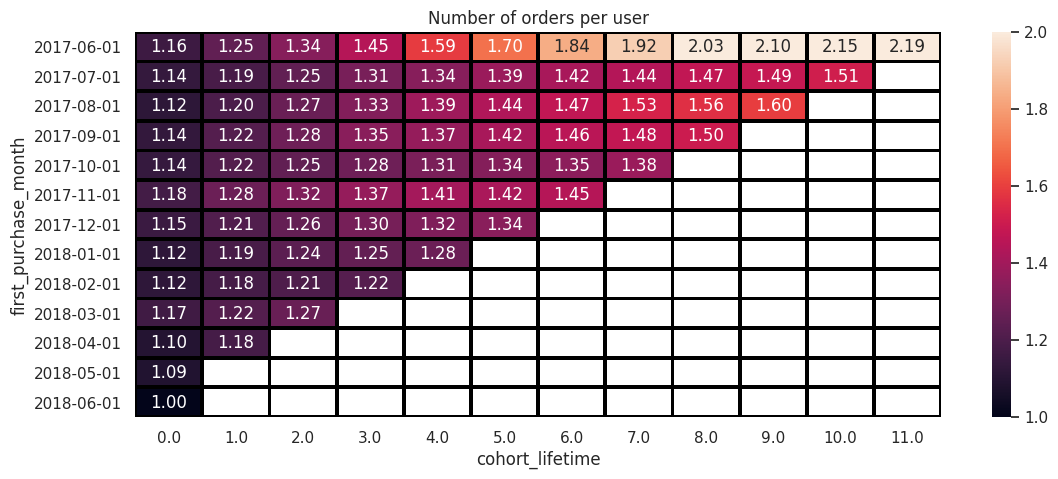

In [55]:
plt.figure(figsize=(13,5))
plt.title('Number of orders per user')
sns.heatmap(data=cohorts_orders_pivot, annot=True, fmt='.2f', linewidth=2, linecolor='black', vmax=2)


__Conclusion__: the cumulative number of orders per user show the tendency of inceasing by the end of the lifetime of each cohort. The loger the lifetime the more effective the cohort.

#### What is the average purchase size?

In [56]:
orders.head()

uid first_purchase_date              buy_ts  revenue  \
0   313578113262317          2018-01-03 2018-01-03 21:51:00     0.55   
1  1575281904278712          2017-06-03 2017-06-03 10:13:00     1.22   
2  1575281904278712          2017-06-03 2017-06-03 17:39:00     1.83   
3  2429014661409475          2017-10-11 2017-10-11 18:33:00    73.33   
4  2464366381792757          2018-01-28 2018-01-28 15:54:00     2.44   

  purchase_date first_purchase_month purchase_month  
0    2018-01-03           2018-01-01     2018-01-01  
1    2017-06-03           2017-06-01     2017-06-01  
2    2017-06-03           2017-06-01     2017-06-01  
3    2017-10-11           2017-10-01     2017-10-01  
4    2018-01-28           2018-01-01     2018-01-01

Let's calculate overall average purchase size

In [57]:
avg_check = orders['revenue'].mean().round()
avg_check

5.0

In [58]:
avg_check_daily = orders.groupby('purchase_date')['revenue'].mean()
avg_check_daily.describe()

count    364.000000
mean       4.936188
std        2.021881
min        1.948000
25%        3.960635
50%        4.561548
75%        5.411037
max       29.133313
Name: revenue, dtype: float64

In [59]:
avg_check_monthly = orders.groupby('purchase_month')['revenue'].mean().reset_index()
avg_check_monthly

purchase_month   revenue
0      2017-06-01  4.060106
1      2017-07-01  5.306589
2      2017-08-01  4.847139
3      2017-09-01  5.416448
4      2017-10-01  4.928280
5      2017-11-01  4.783518
6      2017-12-01  5.852139
7      2018-01-01  4.112927
8      2018-02-01  4.840095
9      2018-03-01  5.413930
10     2018-04-01  5.150645
11     2018-05-01  4.771279
12     2018-06-01  3.420000

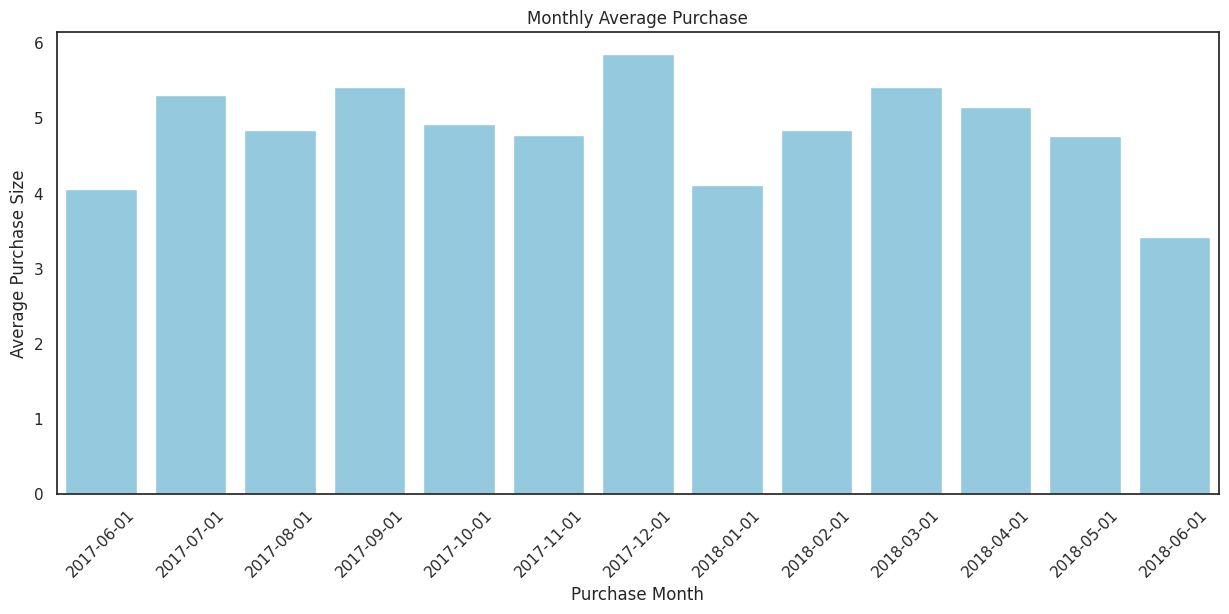

In [60]:
plt.figure(figsize=(15,6))
sns.barplot(x=avg_check_monthly['purchase_month'].astype(str), y='revenue', data=avg_check_monthly, color='skyblue')
plt.title('Monthly Average Purchase')
plt.xlabel('Purchase Month')
plt.ylabel('Average Purchase Size')
plt.xticks(rotation=45)
plt.show()

In [61]:
avg_check_cohorts = orders.groupby(['first_purchase_month','purchase_month'])['revenue'].mean().reset_index()
avg_check_cohorts['cohort_lifetime'] = ((avg_check_cohorts['purchase_month'] - avg_check_cohorts['first_purchase_month']) / np.timedelta64(1,'M')).round()
avg_check_cohorts.head()

first_purchase_month purchase_month   revenue  cohort_lifetime
0           2017-06-01     2017-06-01  4.060106              0.0
1           2017-06-01     2017-07-01  5.547006              1.0
2           2017-06-01     2017-08-01  5.088161              2.0
3           2017-06-01     2017-09-01  8.545575              3.0
4           2017-06-01     2017-10-01  7.084178              4.0

In [62]:
avg_check_cohorts_pivot = avg_check_cohorts.pivot_table(
    index=avg_check_cohorts['first_purchase_month'].astype(str), 
    columns='cohort_lifetime', 
    values='revenue', 
    aggfunc='mean'
)

avg_check_cohorts_pivot.round(2).fillna('')

cohort_lifetime       0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
first_purchase_month                                                          
2017-06-01            4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01            5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01            4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01            4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01            4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01   
2017-11-01            4.37    4.1   4.47   6.28   4.44   3.73    4.6          
2017-12-01            4.11   4.23  20.07  26.08  15.95  14.11                 
2018-01-01            3.69   4.44   6.45   7.52   2.71                        
2018-02-01            3.71   4.58   3.45   3.87                               
2018-03-01            4.14   5.97   6.33                                      
2018-04-01            4.25    6.2                                             
2018-05-01            4.29                                                    
2018-06-01            3.42                                                    

cohort_lifetime       8.0    9.0    10.0  11.0  
first_purchase_month                            
2017-06-01            5.28   8.01  12.04  6.04  
2017-07-01            5.35  11.79   5.65        
2017-08-01             8.7    5.6               
2017-09-01            7.79                      
2017-10-01                                      
2017-11-01                                      
2017-12-01                                      
2018-01-01                                      
2018-02-01                                      
2018-03-01                                      
2018-04-01                                      
2018-05-01                                      
2018-06-01

<AxesSubplot:title={'center':'Average purchase size'}, xlabel='cohort_lifetime', ylabel='first_purchase_month'>

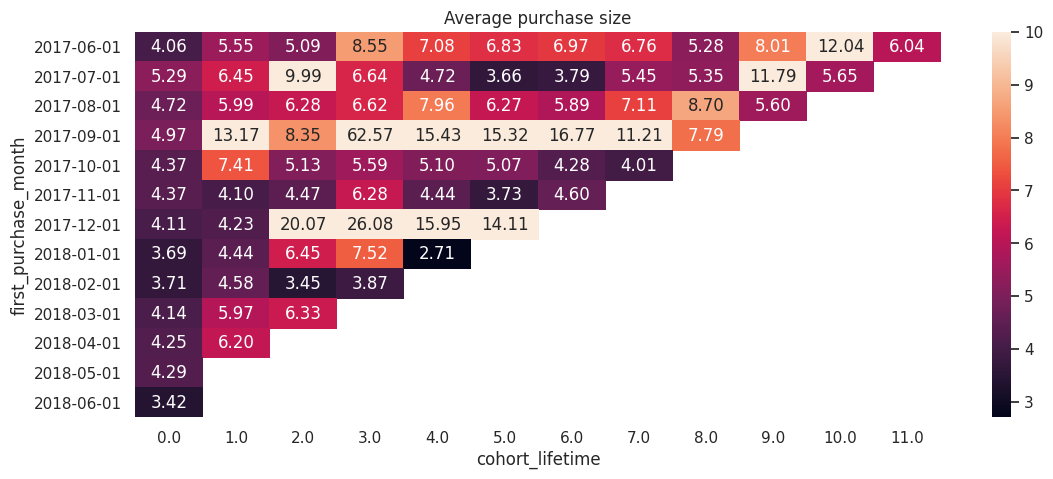

In [63]:
plt.figure(figsize=(13,5))
plt.title('Average purchase size')
sns.heatmap(data=avg_check_cohorts_pivot, annot=True, fmt='.2f', linecolor='black', vmax=10)


__Conclusion__:

The average purchase size changes across cohorts and months with no clear tendency, peaking in months like December 2017. Cohorts that have highest average check are those which had their first purchase in September and December 2017. Overall average purchase size is about $5.

#### How much money do they bring? (LTV)

In [64]:
ltv_cohorts = orders.groupby(['first_purchase_month','purchase_month'])['revenue'].sum().reset_index()
ltv_cohorts.columns = ['first_purchase_month','purchase_month','revenue_sum']

ltv_cohorts = ltv_cohorts.merge(initial_cohort_users, on=['first_purchase_month'])
ltv_cohorts['cohorts_lifetime'] = ((ltv_cohorts['purchase_month'] - ltv_cohorts['first_purchase_month']) / np.timedelta64(1,'M')).round()
ltv_cohorts['ltv'] = ltv_cohorts['revenue_sum'] / ltv_cohorts['cohort_size']
ltv_cohorts

first_purchase_month purchase_month  revenue_sum  cohort_size  \
0            2017-06-01     2017-06-01      9557.49         2023   
1            2017-06-01     2017-07-01       981.82         2023   
2            2017-06-01     2017-08-01       885.34         2023   
3            2017-06-01     2017-09-01      1931.30         2023   
4            2017-06-01     2017-10-01      2068.58         2023   
..                  ...            ...          ...          ...   
74           2018-03-01     2018-05-01      1114.87         3533   
75           2018-04-01     2018-04-01     10600.69         2276   
76           2018-04-01     2018-05-01      1209.92         2276   
77           2018-05-01     2018-05-01     13925.76         2988   
78           2018-06-01     2018-06-01         3.42            1   

    cohorts_lifetime       ltv  
0                0.0  4.724414  
1                1.0  0.485329  
2                2.0  0.437637  
3                3.0  0.954671  
4                4.0  1.022531  
..               ...       ...  
74               2.0  0.315559  
75               0.0  4.657597  
76               1.0  0.531599  
77               0.0  4.660562  
78               0.0  3.420000  

[79 rows x 6 columns]

<AxesSubplot:title={'center':'User Retention by Monthly Cohorts'}, xlabel='cohorts_lifetime', ylabel='first_purchase_month'>

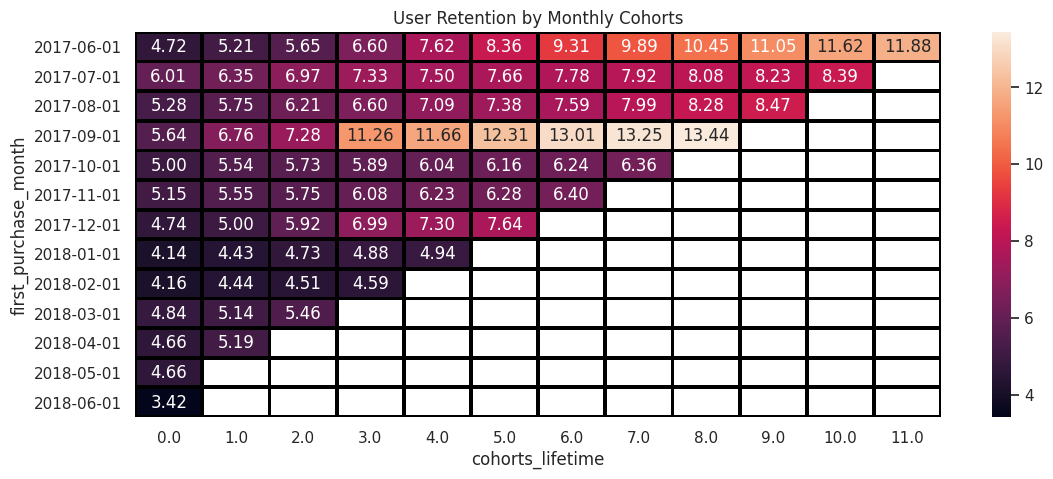

In [65]:
ltv_cohorts_pivot = ltv_cohorts.pivot_table(
    index=ltv_cohorts['first_purchase_month'].astype(str),
    columns='cohorts_lifetime',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)

ltv_cohorts_pivot.fillna('')

sns.set(style='white')
plt.figure(figsize=(13,5))
plt.title('User Retention by Monthly Cohorts')
sns.heatmap(data=ltv_cohorts_pivot, annot=True, fmt='.2f', linewidth=2, linecolor='black')

__Conclusion__:

Users from earlier cohort (June 2017) show higher cumulative LTV over time reaching $11.88 by the end of their lifetime. Newer cohorts show lower LTV. The best user retention is shown by cohorts 2027.06 (which has the longest lifetime) and 2017.09 cohort.

Since cohorts with more extended lifetime tend to deliver more revenue it is advised to invest in long-term retention stratagies

### Marketing

#### How much money was spent? Overall, per source and over time.

In [66]:
costs.head()

source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

In [67]:
overall_costs = costs['costs'].sum()
overall_costs

329131.62

In [68]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [69]:
costs['month'] = costs['dt'].values.astype('datetime64[M]')

In [70]:
total_costs_by_month = costs.groupby('month')['costs'].sum().reset_index()
total_costs_by_month

month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

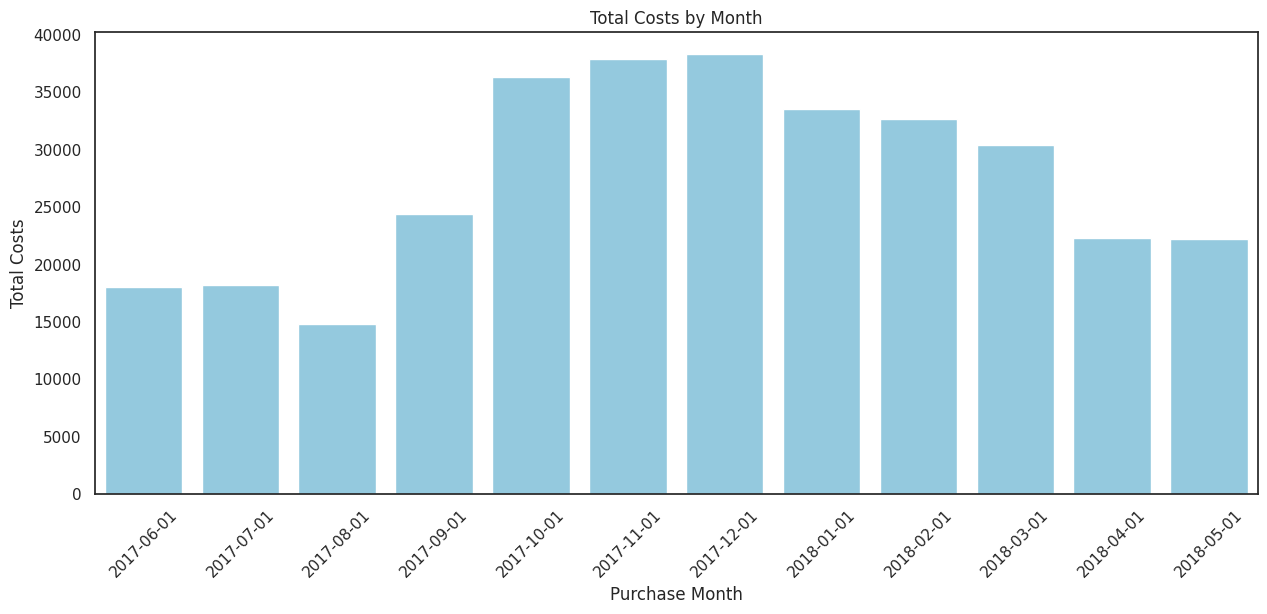

In [71]:
plt.figure(figsize=(15,6))
sns.barplot(data=total_costs_by_month, x=total_costs_by_month['month'].astype(str), y='costs', color='skyblue')
plt.title('Total Costs by Month')
plt.xlabel('Purchase Month')
plt.ylabel('Total Costs')
plt.xticks(rotation=45)
plt.show()

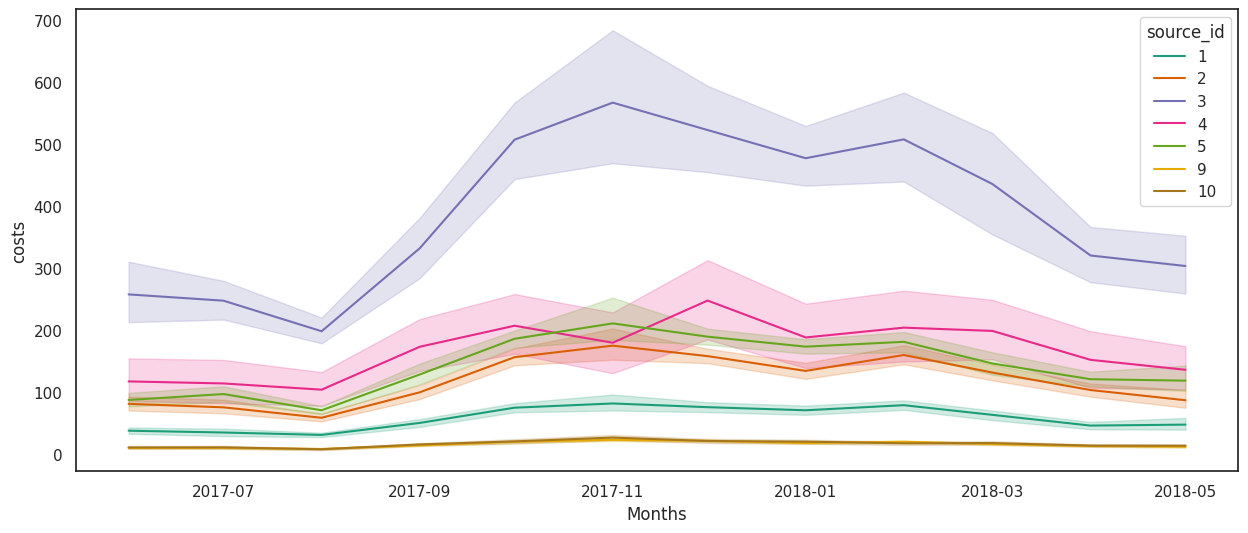

In [72]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=costs, x='month', y='costs', hue='source_id', palette='Dark2')
sns.set_theme(style='white')
plt.xlabel('Months')
plt.ylabel('costs')
plt.show()

__Conclusion__:

- Overall casts make $329131.62

- Sources #3 and #4 are the most cost consuming. This alignes with the highest conversion rate that these sources show.

- Since sources #3 and #4 offer strong returns relative to their costs it is advised to maintain or even increase investment in these channels for continued efficiency.

#### How much did customer acquisition from each of the sources cost?

In [73]:
unique_users_per_source = visits.groupby('source_id')['uid'].nunique().reset_index()
unique_users_per_source

source_id    uid
0          1  18998
1          2  26245
2          3  74756
3          4  83525
4          5  56974
5          6      6
6          7     34
7          9   9264
8         10   8067

In [74]:
cac = costs_by_source.merge(unique_users_per_source, on='source_id')
cac

source_id      costs    uid
0          1   20833.27  18998
1          2   42806.04  26245
2          3  141321.63  74756
3          4   61073.60  83525
4          5   51757.10  56974
5          9    5517.49   9264
6         10    5822.49   8067

In [75]:
cac['cac'] = (cac['costs'] / cac['uid']).round(2)
cac

source_id      costs    uid   cac
0          1   20833.27  18998  1.10
1          2   42806.04  26245  1.63
2          3  141321.63  74756  1.89
3          4   61073.60  83525  0.73
4          5   51757.10  56974  0.91
5          9    5517.49   9264  0.60
6         10    5822.49   8067  0.72

In [76]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
 3   month      2542 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 79.6 KB


In [77]:
costs_by_month = costs.groupby('month')['costs'].sum().reset_index()
costs_by_month

month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

In [78]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uid                   50415 non-null  uint64        
 1   first_purchase_date   50415 non-null  datetime64[ns]
 2   buy_ts                50415 non-null  datetime64[ns]
 3   revenue               50415 non-null  float64       
 4   purchase_date         50415 non-null  datetime64[ns]
 5   first_purchase_month  50415 non-null  datetime64[ns]
 6   purchase_month        50415 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), uint64(1)
memory usage: 3.1 MB


In [79]:
users_by_month = orders.groupby('first_purchase_month')['uid'].nunique().reset_index()
users_by_month.columns = ['month','uid']
users_by_month

month   uid
0  2017-06-01  2023
1  2017-07-01  1923
2  2017-08-01  1370
3  2017-09-01  2581
4  2017-10-01  4340
5  2017-11-01  4081
6  2017-12-01  4383
7  2018-01-01  3373
8  2018-02-01  3651
9  2018-03-01  3533
10 2018-04-01  2276
11 2018-05-01  2988
12 2018-06-01     1

In [80]:
cac_monthly = costs_by_month.merge(users_by_month, on='month')
cac_monthly['cac_monthly'] = (cac_monthly['costs'] / cac_monthly['uid']).round(2)
cac_monthly

month     costs   uid  cac_monthly
0  2017-06-01  18015.00  2023         8.91
1  2017-07-01  18240.59  1923         9.49
2  2017-08-01  14790.54  1370        10.80
3  2017-09-01  24368.91  2581         9.44
4  2017-10-01  36322.88  4340         8.37
5  2017-11-01  37907.88  4081         9.29
6  2017-12-01  38315.35  4383         8.74
7  2018-01-01  33518.52  3373         9.94
8  2018-02-01  32723.03  3651         8.96
9  2018-03-01  30415.27  3533         8.61
10 2018-04-01  22289.38  2276         9.79
11 2018-05-01  22224.27  2988         7.44

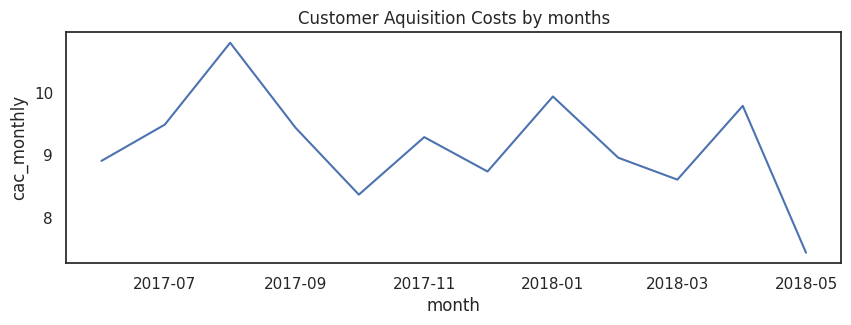

In [81]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=cac_monthly, x='month', y='cac_monthly')
plt.title('Customer Aquisition Costs by months')
plt.show()

In [82]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 358530
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   device             359398 non-null  category      
 1   end_ts             359398 non-null  datetime64[ns]
 2   source_id          359398 non-null  int64         
 3   start_ts           359398 non-null  datetime64[ns]
 4   uid                359398 non-null  uint64        
 5   date               359398 non-null  datetime64[ns]
 6   week               359398 non-null  datetime64[ns]
 7   month              359398 non-null  datetime64[ns]
 8   year               359398 non-null  datetime64[ns]
 9   session_length     359398 non-null  int64         
 10  first_visit_date   359398 non-null  datetime64[ns]
 11  first_visit_month  359398 non-null  datetime64[ns]
 12  cohort_lifetime    359398 non-null  int64         
dtypes: category(1), datetime64[ns](8), int64(3),

In [83]:
n_sources = visits.groupby('uid')['source_id'].nunique().drop_duplicates()
n_sources

uid
11863502262781         1
1260655184775459       2
2892676062023446       3
5081614443770358       4
16118742129536584      5
28094489227360733      6
1242922364974949363    7
Name: source_id, dtype: int64

In [84]:
first_user_source = visits.sort_values(by=['uid','start_ts']).groupby('uid').first()['source_id'].reset_index()
first_user_source.columns = ['uid','first_source_id']
first_user_source.head()

uid  first_source_id
0   11863502262781                3
1   49537067089222                2
2  297729379853735                3
3  313578113262317                2
4  325320750514679                5

In [85]:
orders = orders.merge(first_user_source, on='uid')
orders.head()

uid first_purchase_date              buy_ts  revenue  \
0   313578113262317          2018-01-03 2018-01-03 21:51:00     0.55   
1  1575281904278712          2017-06-03 2017-06-03 10:13:00     1.22   
2  1575281904278712          2017-06-03 2017-06-03 17:39:00     1.83   
3  2429014661409475          2017-10-11 2017-10-11 18:33:00    73.33   
4  2464366381792757          2018-01-28 2018-01-28 15:54:00     2.44   

  purchase_date first_purchase_month purchase_month  first_source_id  
0    2018-01-03           2018-01-01     2018-01-01                2  
1    2017-06-03           2017-06-01     2017-06-01               10  
2    2017-06-03           2017-06-01     2017-06-01               10  
3    2017-10-11           2017-10-01     2017-10-01                3  
4    2018-01-28           2018-01-01     2018-01-01                5

In [86]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
 3   month      2542 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 79.6 KB


In [87]:
costs_monthly_by_source = costs.groupby(['month','source_id'])['costs'].sum().reset_index()
costs_monthly_by_source.columns = ['first_purchase_month','first_source_id','costs']
costs_monthly_by_source.head()

first_purchase_month  first_source_id    costs
0           2017-06-01                1  1125.61
1           2017-06-01                2  2427.38
2           2017-06-01                3  7731.65
3           2017-06-01                4  3514.80
4           2017-06-01                5  2616.12

In [88]:
users_monthly_by_source = orders.groupby(['first_purchase_month','first_source_id'])['uid'].nunique().reset_index()
users_monthly_by_source.columns = ['first_purchase_month','first_source_id','uid']
users_monthly_by_source.head()

first_purchase_month  first_source_id  uid
0           2017-06-01                1  190
1           2017-06-01                2  235
2           2017-06-01                3  638
3           2017-06-01                4  413
4           2017-06-01                5  384

In [89]:
CAC_monthly_by_source = users_monthly_by_source.merge(costs_monthly_by_source, on=['first_purchase_month','first_source_id'])
CAC_monthly_by_source['CAC'] = (CAC_monthly_by_source['costs'] / CAC_monthly_by_source['uid']).round(2)
CAC_monthly_by_source.head()

first_purchase_month  first_source_id  uid    costs    CAC
0           2017-06-01                1  190  1125.61   5.92
1           2017-06-01                2  235  2427.38  10.33
2           2017-06-01                3  638  7731.65  12.12
3           2017-06-01                4  413  3514.80   8.51
4           2017-06-01                5  384  2616.12   6.81

In [90]:
total_cac_by_source = CAC_monthly_by_source.groupby(['first_source_id'])['CAC'].mean().round(2).reset_index()
total_cac_by_source

first_source_id    CAC
0                1   7.21
1                2  12.50
2                3  13.80
3                4   6.44
4                5   7.45
5                9   5.42
6               10   4.87

In [91]:
fig = px.bar(total_cac_by_source, x='first_source_id', y='CAC')
fig.update_xaxes(type='category')
fig.show()

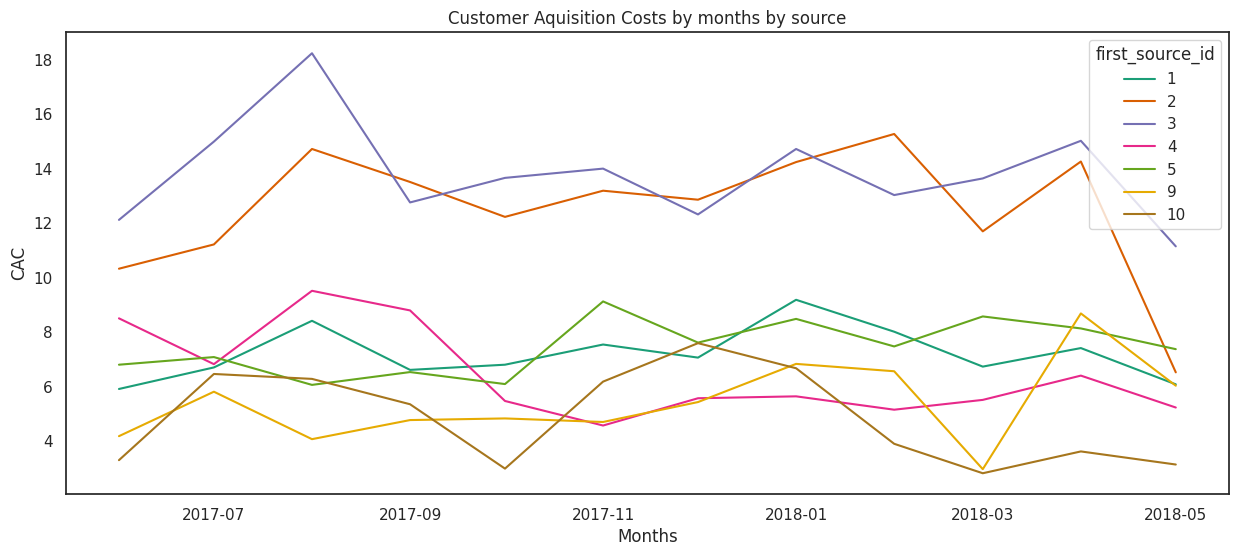

In [92]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=CAC_monthly_by_source, x='first_purchase_month', y='CAC', hue='first_source_id', palette='Dark2')
sns.set_theme(style='white')
plt.title('Customer Aquisition Costs by months by source')
plt.xlabel('Months')
plt.ylabel('CAC')
plt.show()

__Conclusion__:

- Source __#2__ and __#3__ show the highest CAC, while having the highest conversion rate.
- Source #10 has the lowest value of CAC at the same time showing the lowest conversion. 
- Throughout the period under study the CAC is higher in the beginning and decreases over time. Same is true for each marketing source separately. 

Since investing more into each customer brings better conversion, it is advised to maintain this approach.

#### How worthwhile where the investments? (ROI)

In [93]:
CAC_monthly_by_source.head()


first_purchase_month  first_source_id  uid    costs    CAC
0           2017-06-01                1  190  1125.61   5.92
1           2017-06-01                2  235  2427.38  10.33
2           2017-06-01                3  638  7731.65  12.12
3           2017-06-01                4  413  3514.80   8.51
4           2017-06-01                5  384  2616.12   6.81

In [94]:
ltv_cohorts.head()

first_purchase_month purchase_month  revenue_sum  cohort_size  \
0           2017-06-01     2017-06-01      9557.49         2023   
1           2017-06-01     2017-07-01       981.82         2023   
2           2017-06-01     2017-08-01       885.34         2023   
3           2017-06-01     2017-09-01      1931.30         2023   
4           2017-06-01     2017-10-01      2068.58         2023   

   cohorts_lifetime       ltv  
0               0.0  4.724414  
1               1.0  0.485329  
2               2.0  0.437637  
3               3.0  0.954671  
4               4.0  1.022531

In [95]:
roi = CAC_monthly_by_source.merge(ltv_cohorts, on='first_purchase_month')
roi.head()

first_purchase_month  first_source_id  uid    costs   CAC purchase_month  \
0           2017-06-01                1  190  1125.61  5.92     2017-06-01   
1           2017-06-01                1  190  1125.61  5.92     2017-07-01   
2           2017-06-01                1  190  1125.61  5.92     2017-08-01   
3           2017-06-01                1  190  1125.61  5.92     2017-09-01   
4           2017-06-01                1  190  1125.61  5.92     2017-10-01   

   revenue_sum  cohort_size  cohorts_lifetime       ltv  
0      9557.49         2023               0.0  4.724414  
1       981.82         2023               1.0  0.485329  
2       885.34         2023               2.0  0.437637  
3      1931.30         2023               3.0  0.954671  
4      2068.58         2023               4.0  1.022531

In [96]:
roi['ROI'] = roi['ltv'] / roi['CAC']
roi.head()

first_purchase_month  first_source_id  uid    costs   CAC purchase_month  \
0           2017-06-01                1  190  1125.61  5.92     2017-06-01   
1           2017-06-01                1  190  1125.61  5.92     2017-07-01   
2           2017-06-01                1  190  1125.61  5.92     2017-08-01   
3           2017-06-01                1  190  1125.61  5.92     2017-09-01   
4           2017-06-01                1  190  1125.61  5.92     2017-10-01   

   revenue_sum  cohort_size  cohorts_lifetime       ltv       ROI  
0      9557.49         2023               0.0  4.724414  0.798043  
1       981.82         2023               1.0  0.485329  0.081981  
2       885.34         2023               2.0  0.437637  0.073925  
3      1931.30         2023               3.0  0.954671  0.161262  
4      2068.58         2023               4.0  1.022531  0.172725

In [97]:
roi_pivot = roi.pivot_table(
    index=roi['first_purchase_month'].astype(str),
    columns='cohorts_lifetime',
    values='ROI',
    aggfunc='mean'
).cumsum(axis=1).round(2)
roi_pivot.fillna('')

cohorts_lifetime      0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
first_purchase_month                                                         
2017-06-01            0.78  0.86  0.93  1.09  1.26  1.38  1.53  1.63  1.72   
2017-07-01            0.79  0.83  0.91  0.96  0.98  1.01  1.02  1.04  1.06   
2017-08-01            0.69  0.75  0.81  0.86  0.93  0.96  0.99  1.05  1.08   
2017-09-01            0.78  0.93   1.0  1.55  1.61   1.7  1.79  1.83  1.85   
2017-10-01            0.85  0.94  0.97   1.0  1.03  1.05  1.06  1.08         
2017-11-01            0.72  0.78  0.81  0.85  0.87  0.88   0.9               
2017-12-01            0.63  0.66  0.78  0.92  0.97  1.01                     
2018-01-01            0.49  0.53  0.57  0.58  0.59                           
2018-02-01            0.60  0.64  0.65  0.66                                 
2018-03-01            0.89  0.95  1.01                                       
2018-04-01            0.63   0.7                                             
2018-05-01            0.81                                                   

cohorts_lifetime      9.0   10.0  11.0  
first_purchase_month                    
2017-06-01            1.82  1.91  1.96  
2017-07-01            1.08   1.1        
2017-08-01            1.11              
2017-09-01                              
2017-10-01                              
2017-11-01                              
2017-12-01                              
2018-01-01                              
2018-02-01                              
2018-03-01                              
2018-04-01                              
2018-05-01

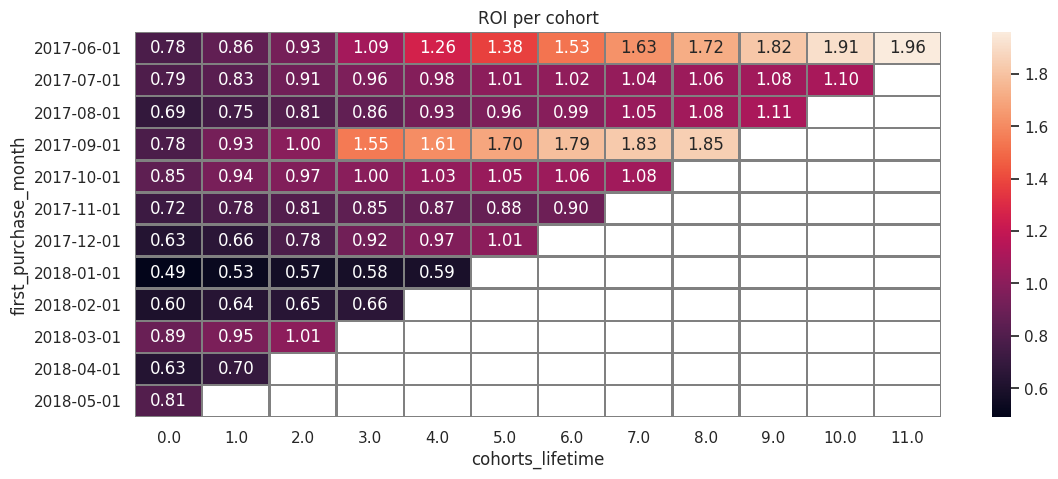

In [98]:
plt.figure(figsize=(13,5))
sns.heatmap(roi_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey')
plt.title('ROI per cohort')
plt.show()

In [99]:
orders.head()

uid first_purchase_date              buy_ts  revenue  \
0   313578113262317          2018-01-03 2018-01-03 21:51:00     0.55   
1  1575281904278712          2017-06-03 2017-06-03 10:13:00     1.22   
2  1575281904278712          2017-06-03 2017-06-03 17:39:00     1.83   
3  2429014661409475          2017-10-11 2017-10-11 18:33:00    73.33   
4  2464366381792757          2018-01-28 2018-01-28 15:54:00     2.44   

  purchase_date first_purchase_month purchase_month  first_source_id  
0    2018-01-03           2018-01-01     2018-01-01                2  
1    2017-06-03           2017-06-01     2017-06-01               10  
2    2017-06-03           2017-06-01     2017-06-01               10  
3    2017-10-11           2017-10-01     2017-10-01                3  
4    2018-01-28           2018-01-01     2018-01-01                5

In [100]:
ltv_by_source=orders.groupby(['first_source_id']).agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_by_source.columns=['first_source_id','users','revenue']
ltv_by_source['ltv']=ltv_by_source['revenue']/ltv_by_source['users']
ltv_by_source

first_source_id  users   revenue        ltv
0                1   2899  31090.55  10.724577
1                2   3506  46923.61  13.383802
2                3  10473  54511.24   5.204931
3                4  10296  56696.83   5.506685
4                5   6931  52624.02   7.592558
5                7      1      1.22   1.220000
6                9   1088   5759.40   5.293566
7               10   1329   4450.33   3.348631

In [101]:
costs_by_source.columns = ['first_source_id','costs']
roi_by_source = costs_by_source.merge(ltv_by_source, on=['first_source_id'])
roi_by_source['cac']=roi_by_source['costs']/roi_by_source['users']
roi_by_source['roi']=roi_by_source['ltv']/roi_by_source['cac']

roi_by_source

first_source_id      costs  users   revenue        ltv        cac       roi
0                1   20833.27   2899  31090.55  10.724577   7.186364  1.492351
1                2   42806.04   3506  46923.61  13.383802  12.209367  1.096191
2                3  141321.63  10473  54511.24   5.204931  13.493901  0.385725
3                4   61073.60  10296  56696.83   5.506685   5.931779  0.928336
4                5   51757.10   6931  52624.02   7.592558   7.467479  1.016750
5                9    5517.49   1088   5759.40   5.293566   5.071222  1.043844
6               10    5822.49   1329   4450.33   3.348631   4.381106  0.764335

In [102]:
total_cac_by_source

first_source_id    CAC
0                1   7.21
1                2  12.50
2                3  13.80
3                4   6.44
4                5   7.45
5                9   5.42
6               10   4.87

In [103]:
fig = px.bar(roi_by_source, x='first_source_id', y='roi')
fig.update_xaxes(type='category')
fig.show()

__Conclusion__:

Cohorts 2017.06 and 2017.09 have the best ROI. 
Same cohorts show the best user retention. 

The most effective from the point of view of ROI are sources __#1__ and __#2__. But cosidering the highest conversion rate and moderate customer acquisition cost attention should also be paid to source __#4__.

It is advised to invest more into the marketing source __#4__ and stress on strategies affecting user retention. 


### Overall conclusion and recommendations

In this project, we performed a comprehensive analysis of Yandex.Afisha’s user data, sales, and marketing expenses to help optimize their marketing budget and improve user retention. The analysis was broken down into three main areas:

__Product Usage:__ We examined user engagement metrics by calculating daily, weekly, and monthly active users to understand overall usage patterns. Session counts and retention rates were also analyzed to see how frequently users interact with the product and how well Yandex.Afisha retains its customers over time.

__Sales Performance:__ We assessed the time from initial visit to first purchase to understand user conversion. We calculated the number of orders per user, purchase size, and customer lifetime value (LTV) to gain insights into revenue generation and user value across different cohorts.

__Marketing Efficiency:__ By analyzing marketing costs per channel and calculating customer acquisition cost (CAC) and return on investment (ROI), we identified the most cost-effective marketing channels. We evaluated the effectiveness of each source in converting users and driving profitable customer relationships.

__Summary of Findings__

The analysis revealed key insights into user behavior, seasonality, and channel performance. High-performing marketing sources with low CAC and strong conversion rates were identified, while seasonal patterns suggested that increasing promotional activities around holidays could drive significant engagement.

__Recommendations:__

- Increase Budget for High-Performing Marketing Sources: Sources #1 and #2 show the best return of investments rate. Source #4 demonstrates the highest conversion rate and moderate CAC and ROI. Prioritizing this channels will yield the best return on marketing spend.
- Leverage Seasonal Trends: Boost promotional activities during the holiday season when user engagement spikes, and consider follow-up campaigns to retain users after the season.
- Invest in Retention Stratagies: Introduce loyalty programs, exclusive content, or personalized offers to increase repeat purchases, maximize LTV, and encourage long-term customer relationships.
- Optimize Marketing Costs: Reallocate budget away from sources with higher CAC and lower conversion rates to maximize the efficiency of marketing investments (Source #2).


These strategies will help Yandex.Afisha optimize its marketing budget, improve retention, and increase overall revenue.